In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import files
# uploaded = files.upload()

Saving The Lannister Data Chronicles_ Decrypting Diabetes.csv to The Lannister Data Chronicles_ Decrypting Diabetes.csv


In [3]:
# file_name = list(uploaded.keys())[0]
file_name="TheLannister_Data_Chronicles_Decrypting_Diabetes.csv"
data = pd.read_csv(file_name)

In [4]:
print(data.head())

   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1

In [5]:
print(data.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [6]:
print( data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
data = data.fillna(data.median())

In [8]:
target = 'Diabetes_012'

In [9]:
X = data.drop(target, axis=1)
y = data[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
rf_p = rf_model.predict(X_test)

In [14]:
rf_accuracy = accuracy_score(y_test, rf_p)
rf_precision = precision_score(y_test, rf_p, average='weighted')
rf_recall = recall_score(y_test, rf_p, average='weighted')
rf_f1 = f1_score(y_test, rf_p, average='weighted')

In [36]:
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')
print('\nRandom Forest - Classification Report:\n', classification_report(y_test, rf_p))

Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 Score: 0.81

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     42795
           1       0.00      0.00      0.00       944
           2       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



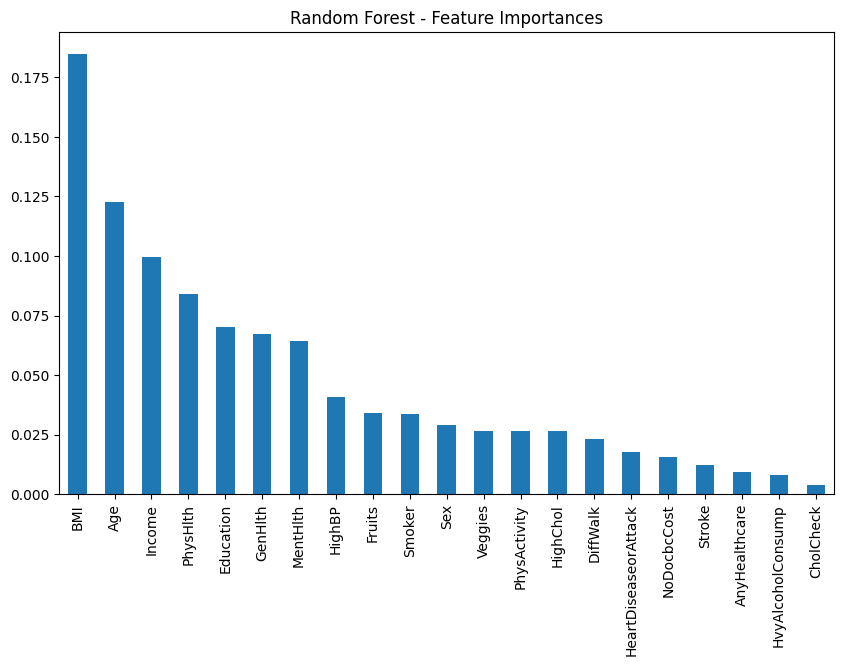

In [17]:
rf_f = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_f.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Random Forest - Feature Importances')
plt.show()

In [19]:
correlation_matrix = data.corr()

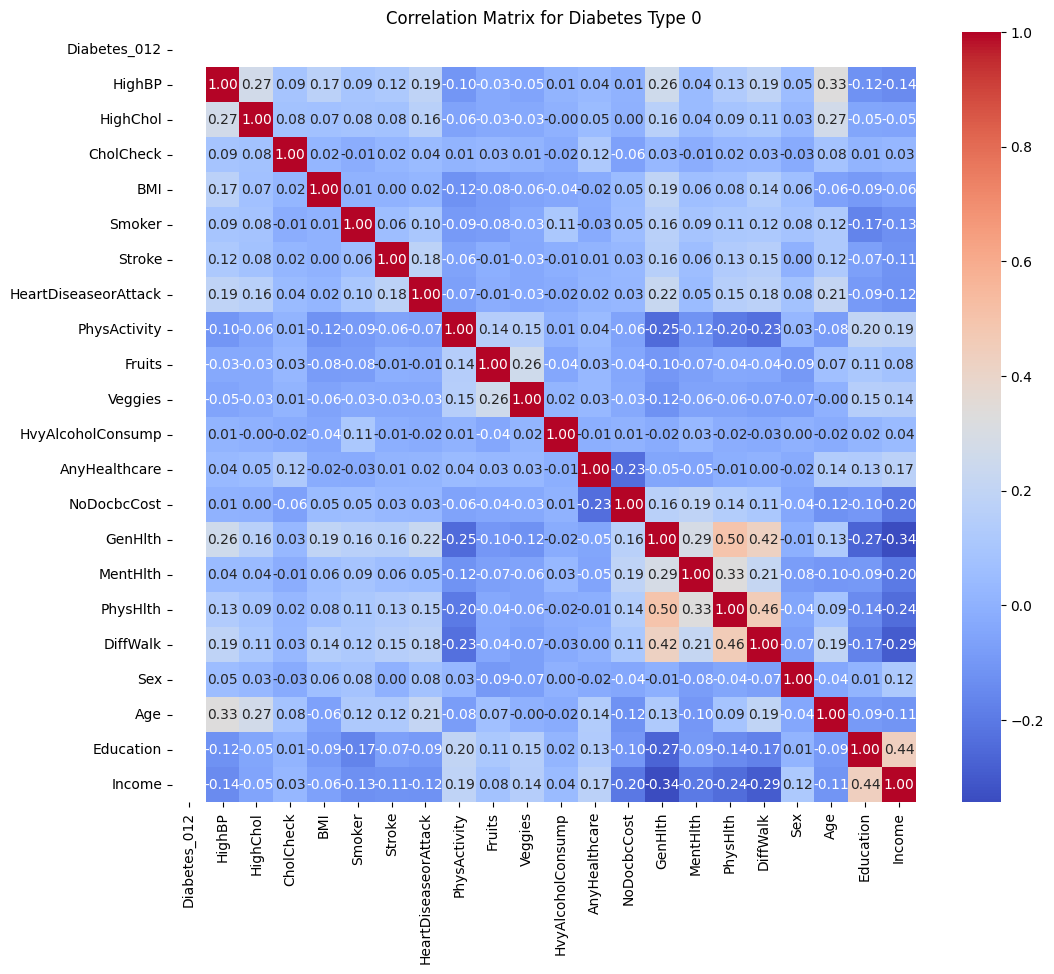

Most significant features for Diabetes Type 0:
HighBP     HighBP      1.000000
GenHlth    PhysHlth    0.496953
PhysHlth   DiffWalk    0.458492
Education  Income      0.435170
DiffWalk   GenHlth     0.423065
dtype: float64


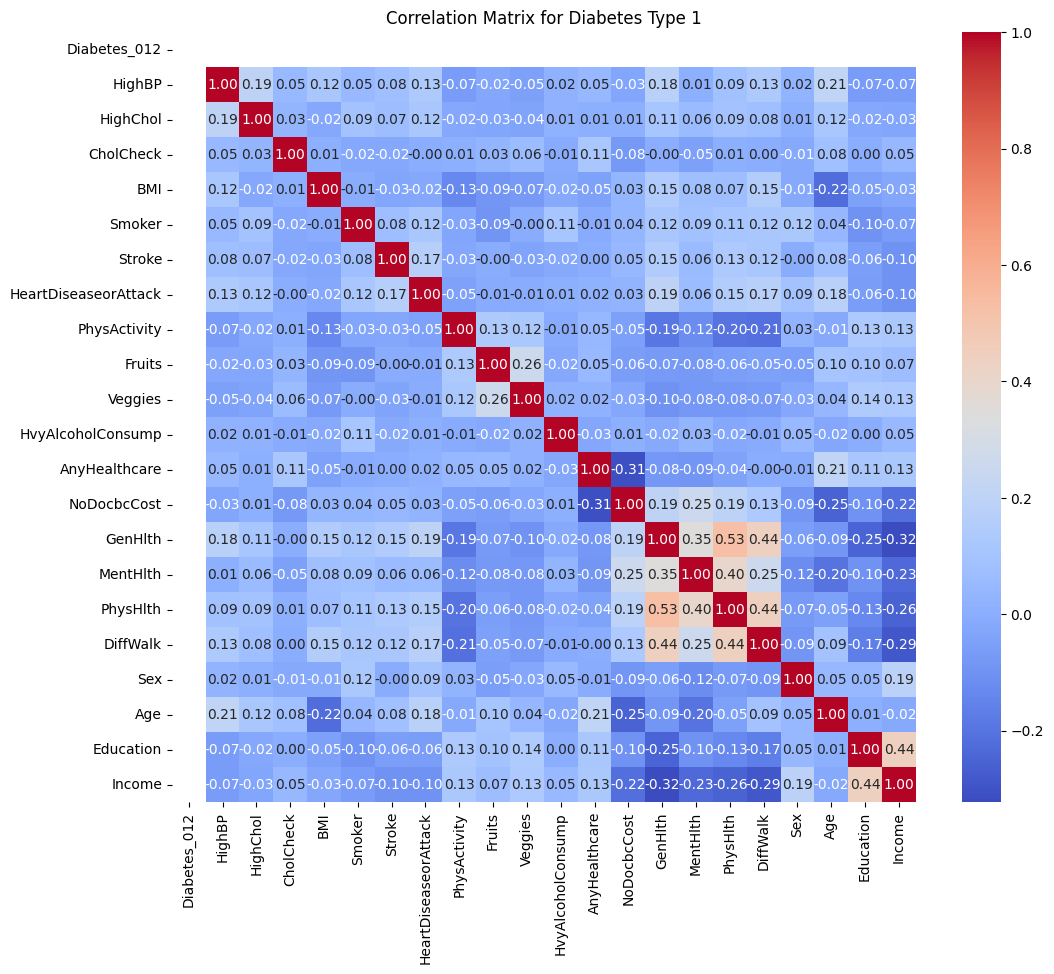

Most significant features for Diabetes Type 1:
HighBP     HighBP      1.000000
PhysHlth   GenHlth     0.525353
Education  Income      0.441619
DiffWalk   PhysHlth    0.441027
           GenHlth     0.440287
dtype: float64


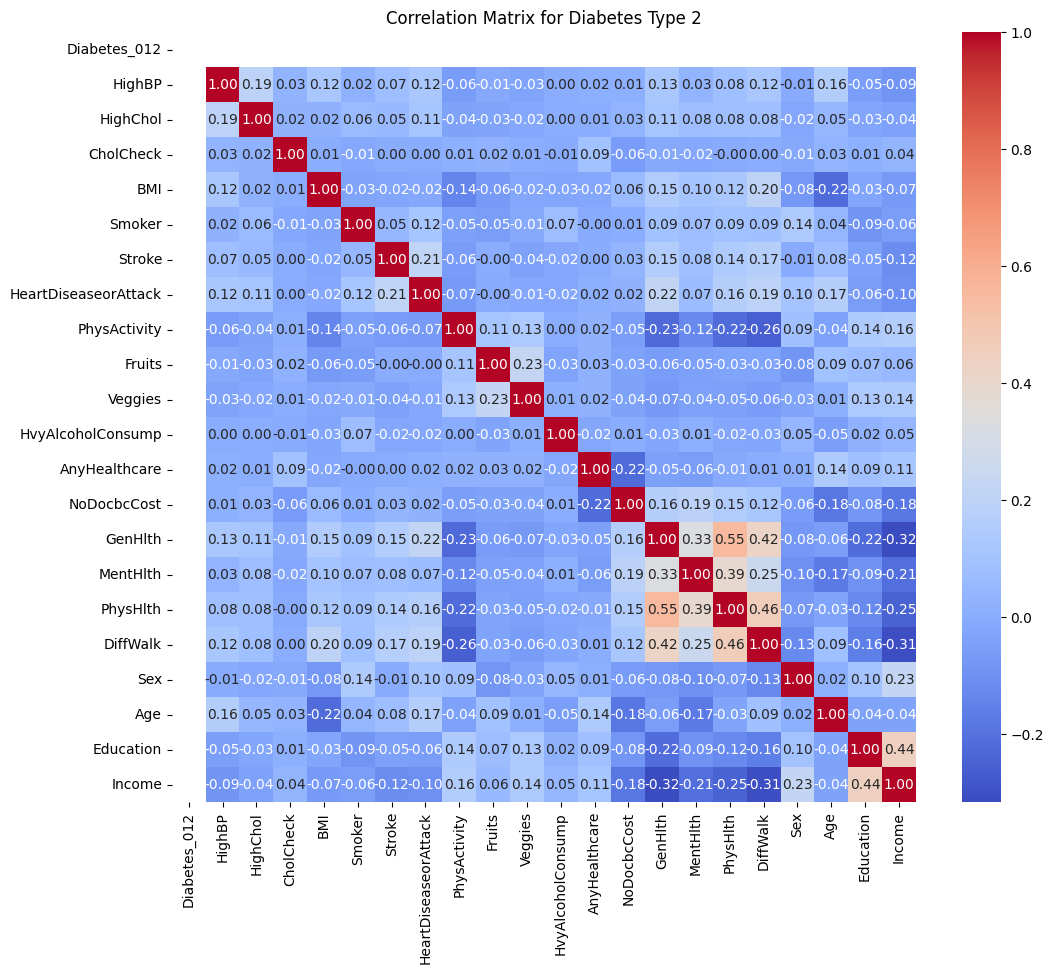

Most significant features for Diabetes Type 2:
HighBP     HighBP      1.000000
GenHlth    PhysHlth    0.547667
DiffWalk   PhysHlth    0.456270
Education  Income      0.443203
GenHlth    DiffWalk    0.421492
dtype: float64


In [35]:

diabetes_types = [0, 1, 2]

for diabetes_type in diabetes_types:
    subset = data[data[target] == diabetes_type]
    correlation_matrix = subset.corr()


    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Correlation Matrix for Diabetes Type {diabetes_type}')
    plt.show()
    print(f"Most significant features for Diabetes Type {diabetes_type}:")
    print(subset.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head())
